# Data Science Methodology for Breast Cancer Diagnosis (DSM-BCD)

**Problema.** Colombia presenta limitaciones con respecto al acceso de la detección y el diagnóstico temprano del cáncer, provocado en la mayoría de los casos por factores como el estrato socio-económico, la cobertura del seguro de salud, el origen y la accesibilidad. En promedio, el tiempo de espera de un paciente es de 90 días desde la aparición de los síntomas hasta el diagnóstico de dicho cáncer. La primera acción para reducir la tasa de mortalidad por cáncer de mama debe estar enfocada en la agilidad del diagnóstico y el acceso oportuno a la atención.  Así, el objetivo de esta investigación es aplicar las etapas de la metodología KDD\footnote{Knowledge Discovery in Databases} al conjunto de datos de morbilidad por cáncer entre los años 2019 y 2020 en el municipio de Pereira-Risaralda. Esto con la finalidad de pronosticar y caracterizar el tipo de población mas susceptible de padecer esta enfermedad según su edad, genero, zona y régimen de salud.

**Conjunto de datos.** Un total de 817 muestras de tumores de mama se perfilaron con cinco plataformas diferentes como se ha descrito previamente (Cancer Genome Atlas Research Network, 2014) y también se perfilaron 633 casos mediante matriz de proteínas en fase inversa (RPPA)

## Aprendizaje No supervisado

En el aprendizaje No supervisado, se trabaja con datos sin etiquetar cuya estructura es desconocida. El objetivo será la extracción de información significativa, sin la referencia de variables de salida conocidas, y mediante la exploración de la estructura de dichos datos sin etiquetar. En este caso de estudio se utilizará la siguiente técnica:

### Agrupamiento (Clustering)
El agrupamiento es una técnica exploratoria de análisis de datos, que se usa para organizar información en grupos sin tener conocimiento previo de su estructura. Cada grupo es un conjunto de objetos similares que se diferencia de los objetos de otros grupos. El objetivo es obtener un número de grupos de características similares. Los modelos de Clustering más conocidos son los siguientes:

#### K-means: 
Es un algoritmo diseñado para dividir datos no etiquetados en un cierto número (k) de agrupaciones distintas. En otras palabras, k-means encuentra observaciones que comparten características importantes, las une y las clasifica en grupos.

#### K-modes: 
El algoritmo de agrupación de k-modes es una extensión del
algoritmo k-means. Este algoritmo fue diseñado para agrupar grandes conjuntos de datos categóricos, y tiene como objetivo obtener las k modas que
representan a un conjunto de datos determinado.


## Desarrollo Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
with open('Breast_Clean_Data.csv') as f:
    dataset=pd.read_csv(f, delimiter=',')

In [3]:
dataset.head(10)

,diagnosis_age,metastasis_stage_code,neoplasm_lymph_code,neoplasm_disease_stage_code,tumor_stage_code,cancer_type_detailed,disease_free_months,disease_free_status,er_status_ihc,er_status_ihc_percent_positive,...,disease_surgical_margin_status,primary_tumor_site,tissue_prospective_indicator,pr_status_ihc,race_category,sex,staging_system,surgical_procedure_first,tmb_nonsynonymous,person_neoplasm_status
0,70.0,m0,n0,stage i,t1c,invasive breast carcinoma,8.5,diseasefree,positive,70-79%,...,negative,C50.912,retrospective,negative,white,female,sentinel node biopsy alone,lumpectomy,0.6,tumor free
1,59.0,m0,n0,stage iia,t2,breast invasive ductal carcinoma,14.4,diseasefree,positive,90-99%,...,positive,C50.912,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,1.0,tumor free
2,56.0,m0,n0 (i-),stage i,t1c,breast invasive lobular carcinoma,43.4,diseasefree,positive,80-89%,...,negative,C50.412,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,0.7,tumor free
3,54.0,m0,n0,stage iia,t2,breast invasive ductal carcinoma,48.1,diseasefree,positive,90-99%,...,negative,C50.912,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,1.3,tumor free
4,39.0,m0,n0 (i-),stage iia,t2,breast mixed ductal and lobular carcinoma,47.2,diseasefree,negative,90-99%,...,negative,C50.212,retrospective,positive,white,female,sentinel node biopsy alone,lumpectomy,2.6,tumor free
5,52.0,m0,n1a,stage iib,t2,breast invasive ductal carcinoma,20.9,diseasefree,positive,50-59%,...,negative,C50.911,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,5.6,tumor free
6,39.0,m0,n1a,stage iiia,t3,breast invasive ductal carcinoma,13.7,diseasefree,positive,70-79%,...,negative,C50.912,retrospective,positive,black or african american,female,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,1.0,tumor free
7,54.0,m0,n0 (i-),stage iia,t2,invasive breast carcinoma,38.6,diseasefree,negative,90-99%,...,positive,C50.411,retrospective,negative,asian,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,3.4,tumor free
8,77.0,m0,n0 (i-),stage iia,t2,breast invasive ductal carcinoma,8.0,diseasefree,positive,20-29%,...,negative,C50.912,retrospective,negative,white,male,sentinel lymph node biopsy plus axillary disse...,modified radical mastectomy,0.7,tumor free
9,50.0,mx,n1,stage iia,t1c,breast invasive ductal carcinoma,39.3,diseasefree,positive,90-99%,...,negative,C50.912,retrospective,positive,white,female,sentinel lymph node biopsy plus axillary disse...,lumpectomy,1.5,tumor free


In [4]:
dataset.shape

(818, 41)

In [5]:
#data = dataset.sample(frac=0.95, random_state=42)
data = dataset.sample(frac=0.95, random_state=42)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (777, 41)
Unseen Data For Predictions: (41, 41)


In [6]:
from pycaret.clustering import *

exp_clu101 = setup(dataset, normalize = True, 
session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(818, 41)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,31
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(818, 158)"
9,CPU Jobs,-1


### BIRCH Clustering	

In [7]:
birch = create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1178,53.947,1.8163,0,0,0


In [8]:
plot_model(birch,plot='cluster',scale=0.7)

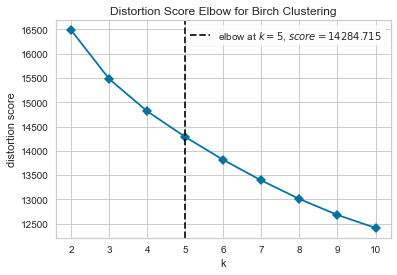

In [9]:
plot_model(birch, plot = 'elbow')

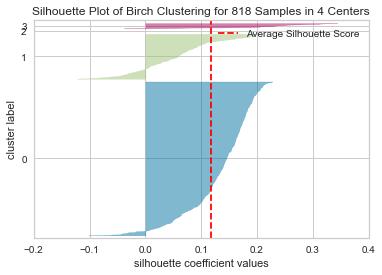

In [10]:
plot_model(birch, plot = 'silhouette')

In [11]:
plot_model(birch, plot = 'tsne')

In [12]:
plot_model(birch, plot = 'distribution', feature = 'oct_embedded')

In [13]:
import matplotlib.pyplot as plt
PATH_CLUSTERS = 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_BIRCH_DESCRIPTIVAS\\'
birch_results = assign_model(birch)

birch_results['oct_embedded']=birch_results['oct_embedded'].astype(str)

In [14]:
'''
a=0
for i in birch_results.columns:
    a= a+1
    cluster=sns.displot(birch_results, x=i, hue="Cluster",
                hue_order=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],
                palette=['#8a93f8','#ec8273','#00cc96', '#ab63fa'],
                multiple="stack")
    plt.tick_params(axis='x', rotation=75)
    plt.savefig(PATH_CLUSTERS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')
    plt.clf()
'''

'\na=0\nfor i in birch_results.columns:\n    a= a+1\n    cluster=sns.displot(birch_results, x=i, hue="Cluster",\n                hue_order=[\'Cluster 0\', \'Cluster 1\', \'Cluster 2\', \'Cluster 3\'],\n                palette=[\'#8a93f8\',\'#ec8273\',\'#00cc96\', \'#ab63fa\'],\n                multiple="stack")\n    plt.tick_params(axis=\'x\', rotation=75)\n    plt.savefig(PATH_CLUSTERS+str(a)+"_"+i+".pdf",bbox_inches = \'tight\')\n    plt.clf()\n'

In [1]:
#sns.pairplot(birch_results, hue="Cluster")
#sns.swarmplot(data=birch_results, x="Cluster")
#sns.scatterplot(data=birch_results, x="oncotree_code",  hue="Cluster")
#sns.catplot(data=birch_results, x="Cluster", y="oncotree_code", hue="Cluster", kind="bar")

In [ ]:
'''for i in range(4):
    cluster = 'Cluster '+ str(i)
    a=birch_results[birch_results['Cluster']==cluster]
    a.to_csv('birch ' + cluster + '.csv',index=False)'''